# IQR Technique

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
df = pd.read_csv("data.csv") #https://www.kaggle.com/code/ashaykatrojwar/feature-selection-iqr-outliers-eda/input?select=data.csv
df

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [73]:
df.shape

(98000, 30)

In [74]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


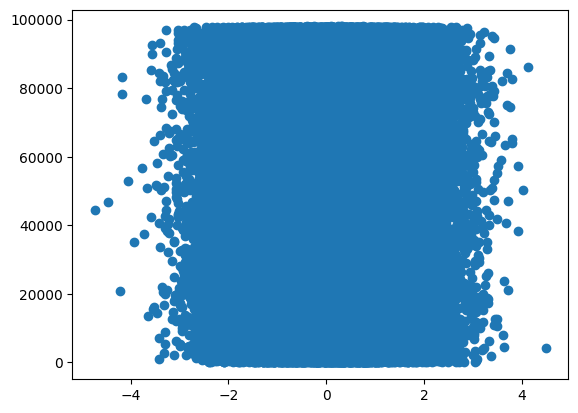

In [78]:
y = np.arange(1, 98001)
plt.scatter(df["f_00"], y) 
plt.xlabel = "f_00"
plt.show()

In [79]:
df.f_00.mean()

0.0012196663854834395

In [80]:
df.f_00.std()

1.0028008443406387

In [81]:
q1 = df.f_00.quantile(0.25)
q3 = df.f_00.quantile(0.75)
q1, q3

(-0.6752257940094875, 0.6772710677039651)

In [82]:
Iqr = q3 - q1
Iqr

1.3524968617134525

In [83]:
min = q1 - 1.5*Iqr
max = q3 + 1.5*Iqr
min, max

(-2.7039710865796662, 2.706016360274144)

In [84]:
#all outliers
df2 = df[(df.f_00<min)|(df.f_00>max)]
df2

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
74,74,2.710738,0.924887,1.073659,-0.494851,0.020841,-2.007446,0.742107,23,4,...,-2.417145,0.793744,0.880600,-0.454014,0.033087,1.356267,-2.354234,-1.304787,0.630287,1.576298
98,98,2.822977,-1.009463,-1.622249,-0.202556,-0.201642,-0.358539,-1.268512,4,10,...,0.654394,-0.513245,-0.369398,-0.417189,0.095146,-1.156745,0.131861,-0.269384,-1.115314,-1.508410
157,157,3.036067,-1.061361,-0.625756,0.298660,1.052501,-0.302267,-1.232697,5,6,...,-0.228868,-0.142800,-0.443933,0.474077,1.462638,0.454288,-0.560402,0.993592,2.447120,-1.719116
385,385,3.066783,0.338474,-0.098414,-1.214687,0.546289,-0.403694,0.861444,6,1,...,0.126021,1.845410,-0.136113,0.933445,-2.100518,-1.046748,0.251385,-0.431557,-1.698590,1.184373
789,789,3.065899,-0.490243,0.685791,-2.388965,1.772330,0.670017,-0.342039,9,4,...,0.218939,0.962809,-0.637763,2.779904,0.014365,1.533224,0.962791,1.389340,-0.171248,2.654186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97028,97028,-2.909756,0.045281,0.091919,-0.680289,-3.695611,0.449436,0.723492,3,1,...,-0.203824,1.060240,-2.026587,-1.872220,-2.636466,2.079384,2.025726,-3.425877,0.213309,0.502387
97048,97048,-3.026556,0.990922,-0.443191,-0.230535,-0.803697,-0.432546,-0.200111,11,1,...,-0.202309,-1.389412,2.445038,-1.312380,-0.067765,-1.500317,0.313900,-0.788137,0.325388,-2.041884
97117,97117,-3.272134,-1.464183,1.054909,-0.128979,0.664595,0.801228,3.001406,10,9,...,-0.268013,0.565021,0.553055,0.477836,-1.384842,-2.121260,1.044132,-0.066500,1.973231,0.274375
97592,97592,2.883961,-0.943966,-1.057784,0.041615,-0.097940,-0.895039,0.911104,4,11,...,-0.516769,-0.216492,0.226098,-0.266879,0.033217,0.096615,1.211356,2.410090,-2.080238,-0.281842


In [88]:
df = df[(df.f_00>min)&(df.f_00<max)]
df

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


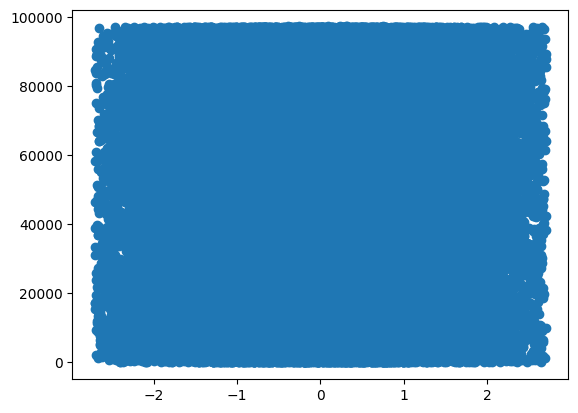

In [89]:
y = np.arange(1, df.shape[0]+1) 
plt.scatter(df["f_00"], y) 
plt.xlabel = "f_00"
plt.show()